<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/physiclaPropertyChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Physical Property Charts
#@markdown Demonstration of how  to make physical property charts in NeqSim
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('classic')
%matplotlib inline

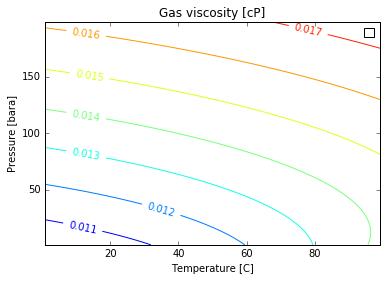

In [5]:
#@title Gas Visocsity Chart
#@markdown How to calculate a viscosity chart for a natural gas
minPressure = 1.0  #@param {type:"number"}
maxPressure = 200.0  #@param {type:"number"}

minTemperature = 1.0  #@param {type:"number"}
maxTemperature = 100.0  #@param {type:"number"}

# Creating a fluid in neqsim
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 0.9)
fluid1.addComponent('ethane', 0.1) 

def realgasviscosity(pressure1, temperature1):
    fluid1.setPressure(pressure1, 'bara')
    fluid1.setTemperature(temperature1, 'C')
    TPflash(fluid1)
    fluid1.initProperties();
    return fluid1.getViscosity('cP')

temperature = np.arange(minTemperature, maxTemperature, int((maxTemperature-minTemperature)/100)+1)
pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/100)+1)

X, Y = np.meshgrid(temperature, pressure)
viscosity = np.fromiter(map(realgasviscosity, X.ravel(), Y.ravel()), X.dtype).reshape(X.shape)

fig, ax = plt.subplots()
CS = ax.contour(temperature,pressure, viscosity)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Gas viscosity [cP]')
plt.ylabel('Pressure [bara]')
plt.xlabel('Temperature [C]')
plt.legend(['viscosity [cP]'])

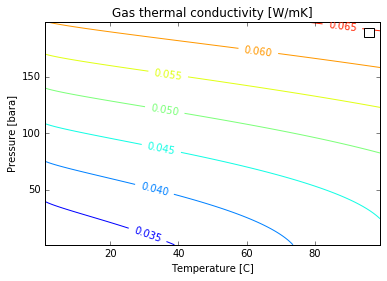

In [10]:
#@title Gas Visocsity Chart
#@markdown How to calculate a viscosity chart for a natural gas
minPressure = 1.0  #@param {type:"number"}
maxPressure = 200.0  #@param {type:"number"}

minTemperature = 1.0  #@param {type:"number"}
maxTemperature = 100.0  #@param {type:"number"}

# Creating a fluid in neqsim
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 0.9)
fluid1.addComponent('ethane', 0.1) 

def realgasthermalcond(pressure1, temperature1):
    fluid1.setPressure(pressure1, 'bara')
    fluid1.setTemperature(temperature1, 'C')
    TPflash(fluid1)
    fluid1.initProperties();
    return fluid1.getThermalConductivity('W/mK')

temperature = np.arange(minTemperature, maxTemperature, int((maxTemperature-minTemperature)/100)+1)
pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/100)+1)

X, Y = np.meshgrid(temperature, pressure)
viscosity = np.fromiter(map(realgasthermalcond, X.ravel(), Y.ravel()), X.dtype).reshape(X.shape)

fig, ax = plt.subplots()
CS = ax.contour(temperature,pressure, viscosity)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Gas thermal conductivity [W/mK]')
plt.ylabel('Pressure [bara]')
plt.xlabel('Temperature [C]')
plt.legend(['Gas thermal conductivity [W/mK]'])

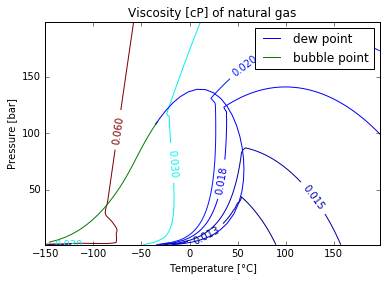

In [17]:
#@title Visocsity chart and phase envelope
#@markdown How to calculate a viscosity chart for a natural gas
minPressure = 1.0  #@param {type:"number"}
maxPressure = 200.0  #@param {type:"number"}

minTemperature = -150.0  #@param {type:"number"}
maxTemperature = 200.0  #@param {type:"number"}

nitrogen = 1.0 #@param {type:"number"}
CO2 = 2.5 #@param {type:"number"}
methane = 80.0  #@param {type:"number"}
ethane = 5.0  #@param {type:"number"}
propane =  2.5 #@param {type:"number"}
ibutane =  1.25 #@param {type:"number"}
nbutane =  1.25 #@param {type:"number"}
ipentane =  0.5 #@param {type:"number"}
npentane =  0.5 #@param {type:"number"}
nhexane =  0.05 #@param {type:"number"}

fluid1 = fluid('srk')
fluid1.addComponent("nitrogen", nitrogen)
fluid1.addComponent("CO2", CO2)
fluid1.addComponent("methane", methane)
fluid1.addComponent("ethane", ethane)
fluid1.addComponent("propane", propane)
fluid1.addComponent("i-butane", ibutane)
fluid1.addComponent("n-butane", nbutane)
fluid1.addComponent("i-butane", ibutane)
fluid1.addComponent("n-pentane", nbutane)
fluid1.addComponent("n-pentane", nbutane)
fluid1.addComponent("n-hexane", nbutane)
fluid1.setMixingRule(2);

def viscosity(temperature1,pressure1):
    fluid1.setPressure(pressure1, 'bara')
    fluid1.setTemperature(temperature1, 'C')
    TPflash(fluid1)
    fluid1.initProperties();
    return fluid1.getViscosity('cP')

temperature = np.arange(minTemperature, maxTemperature, int((maxTemperature-minTemperature)/100)+1)
pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/100)+1)

X, Y = np.meshgrid(temperature, pressure)
viscosityGas = np.fromiter(map(viscosity, X.ravel(), Y.ravel()), X.dtype).reshape(X.shape)

thermoOps = neqsim.thermodynamicOperations.ThermodynamicOperations(fluid1)
thermoOps.calcPTphaseEnvelope()

fig, ax = plt.subplots()
CS = ax.contour(temperature,pressure, viscosityGas, levels=[0.013, 0.015, 0.018, 0.02, 0.03,0.06])
ax.clabel(CS, inline=1, fontsize=10)
plt.plot([x - 273.15 for x in list(thermoOps.getOperation().get("dewT"))],list(thermoOps.getOperation().get("dewP")), label="dew point")
plt.plot([x - 273.15 for x in list(thermoOps.getOperation().get("bubT"))],list(thermoOps.getOperation().get("bubP")), label="bubble point")
plt.title('Viscosity [cP] of natural gas')
plt.xlabel('Temperature [\u00B0C]')
plt.ylabel('Pressure [bar]')
plt.legend()
plt.show()